### Nina Nurrahmawati | nn1221

# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
from urllib.request import urlopen
import matplotlib.pylab as plt
import io
%pylab inline
import scipy.stats
import datetime as dt
import seaborn

Populating the interactive namespace from numpy and matplotlib


/Applications/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
# download data
dataurl1 = urlopen('https://s3.amazonaws.com/tripdata/JC-201707-citibike-tripdata.csv.zip')
dataurl2 = urlopen('https://s3.amazonaws.com/tripdata/JC-201701-citibike-tripdata.csv.zip')
data1 = pd.read_csv(io.BytesIO(dataurl1.read()), compression='zip', sep=',')
data2 = pd.read_csv(io.BytesIO(dataurl2.read()), compression='zip', sep=',')

In [3]:
# check keys
data1.keys()

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [4]:
data2.keys()

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender'],
      dtype='object')

In [5]:
# change column name so it can be merged
data2.columns = (['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'])
data2.keys()

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
# create merged data frame
df = data1.append(data2).reset_index()
# convert to datetime
df['date'] = pd.to_datetime(df['starttime'])
df.head(3)

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,0,340,2017-07-01 00:00:08,2017-07-01 00:05:48,3186,Grove St PATH,40.719586,-74.043117,3267,Morris Canal,40.712419,-74.038526,29643,Subscriber,1994.0,2,2017-07-01 00:00:08
1,1,439,2017-07-01 00:02:35,2017-07-01 00:09:55,3183,Exchange Place,40.716247,-74.033459,3199,Newport Pkwy,40.728745,-74.032108,29585,Subscriber,1980.0,1,2017-07-01 00:02:35
2,2,186,2017-07-01 00:04:33,2017-07-01 00:07:40,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,29219,Subscriber,1984.0,1,2017-07-01 00:04:33


In [7]:
# check abnormality, such as NaN and 0 value
# if the min value contains 0, drop 0 value
# if the count does not match with other variables, drop NaN
df.describe()

,index,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,46499.000000,46499.000000,46499.000000,46499.000000,46499.000000,46499.000000,46499.000000,46499.000000,46499.000000,43153.000000,46499.000000
mean,13916.227295,715.084798,3215.613239,40.722421,-74.046228,3211.618035,40.721933,-74.045666,27427.386159,1979.990499,1.131358
std,9647.854965,5234.918972,34.065026,0.007813,0.010655,73.619242,0.007600,0.010763,2029.749429,10.013404,0.515360
min,0.000000,61.000000,3183.000000,40.692640,-74.096937,152.000000,40.692640,-74.096937,14529.000000,1887.000000,0.000000
25%,5812.000000,238.000000,3187.000000,40.716540,-74.050389,3186.000000,40.716540,-74.049968,26184.000000,1975.000000,1.000000
50%,11624.000000,360.000000,3203.000000,40.721124,-74.044247,3202.000000,40.719586,-74.043117,26305.000000,1982.000000,1.000000
75%,21947.500000,621.000000,3225.000000,40.727224,-74.038526,3214.000000,40.727224,-74.038526,29468.000000,1987.000000,1.000000
max,33572.000000,802101.000000,3281.000000,40.752559,-74.032108,3474.000000,40.777507,-73.967510,29682.000000,2001.000000,2.000000


In [8]:
# each variable counts do not match = drop NaN
# there is 0 value = drop 0
df = df.dropna()
df = df[df!=0]
df = df.dropna()
df.describe()

,index,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000
mean,13873.243686,583.679284,3215.793491,40.722571,-74.046377,3212.141746,40.722049,-74.045813,27388.054939,1980.014456,1.224038
std,9572.246517,4343.365905,34.140643,0.007793,0.010604,69.655500,0.007551,0.010727,2037.990605,9.922544,0.416952
min,1.000000,61.000000,3183.000000,40.692640,-74.096937,152.000000,40.692640,-74.096937,14529.000000,1923.000000,1.000000
25%,5830.000000,235.000000,3187.000000,40.717733,-74.050389,3186.000000,40.716540,-74.049968,26180.000000,1975.000000,1.000000
50%,11574.000000,347.000000,3203.000000,40.721525,-74.044247,3202.000000,40.719586,-74.043117,26300.000000,1982.000000,1.000000
75%,21759.000000,579.000000,3225.000000,40.727224,-74.038526,3215.000000,40.727224,-74.038526,29466.000000,1987.000000,1.000000
max,33572.000000,802101.000000,3281.000000,40.752559,-74.032108,3474.000000,40.777507,-73.967510,29682.000000,2001.000000,2.000000


In [9]:
df.columns

Index(['index', 'tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [10]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2017 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2017 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [11]:
df.describe()

,index,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,33096.000000,9451.000000
mean,13873.243686,583.679284,3215.793491,40.722571,-74.046377,3212.141746,40.722049,-74.045813,27388.054939,1980.014456,1.224038,37.385485,35.735584
std,9572.246517,4343.365905,34.140643,0.007793,0.010604,69.655500,0.007551,0.010727,2037.990605,9.922544,0.416952,9.794652,10.314218
min,1.000000,61.000000,3183.000000,40.692640,-74.096937,152.000000,40.692640,-74.096937,14529.000000,1923.000000,1.000000,16.000000,19.000000
25%,5830.000000,235.000000,3187.000000,40.717733,-74.050389,3186.000000,40.716540,-74.049968,26180.000000,1975.000000,1.000000,30.000000,29.000000
50%,11574.000000,347.000000,3203.000000,40.721525,-74.044247,3202.000000,40.719586,-74.043117,26300.000000,1982.000000,1.000000,35.000000,32.000000
75%,21759.000000,579.000000,3225.000000,40.727224,-74.038526,3215.000000,40.727224,-74.038526,29466.000000,1987.000000,1.000000,43.000000,40.000000
max,33572.000000,802101.000000,3281.000000,40.752559,-74.032108,3474.000000,40.777507,-73.967510,29682.000000,2001.000000,2.000000,94.000000,86.000000


In [12]:
#dropping some data I no longer need
df = df.drop(['index', 'starttime', 'stoptime', 'start station name', 'end station name', 'usertype'], axis=1)

In [13]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,ageM,ageF
count,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,42957.000000,33096.000000,9451.000000
mean,583.679284,3215.793491,40.722571,-74.046377,3212.141746,40.722049,-74.045813,27388.054939,1980.014456,1.224038,37.385485,35.735584
std,4343.365905,34.140643,0.007793,0.010604,69.655500,0.007551,0.010727,2037.990605,9.922544,0.416952,9.794652,10.314218
min,61.000000,3183.000000,40.692640,-74.096937,152.000000,40.692640,-74.096937,14529.000000,1923.000000,1.000000,16.000000,19.000000
25%,235.000000,3187.000000,40.717733,-74.050389,3186.000000,40.716540,-74.049968,26180.000000,1975.000000,1.000000,30.000000,29.000000
50%,347.000000,3203.000000,40.721525,-74.044247,3202.000000,40.719586,-74.043117,26300.000000,1982.000000,1.000000,35.000000,32.000000
75%,579.000000,3225.000000,40.727224,-74.038526,3215.000000,40.727224,-74.038526,29466.000000,1987.000000,1.000000,43.000000,40.000000
max,802101.000000,3281.000000,40.752559,-74.032108,3474.000000,40.777507,-73.967510,29682.000000,2001.000000,2.000000,94.000000,86.000000


In [14]:
# dropping NaN values
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)

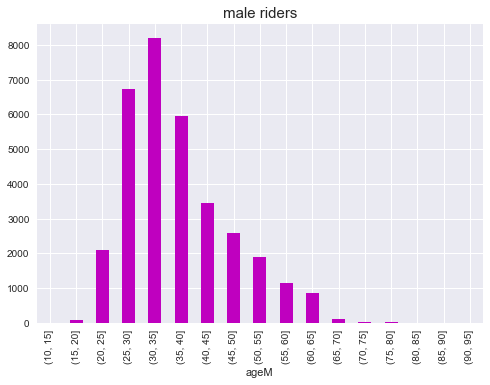

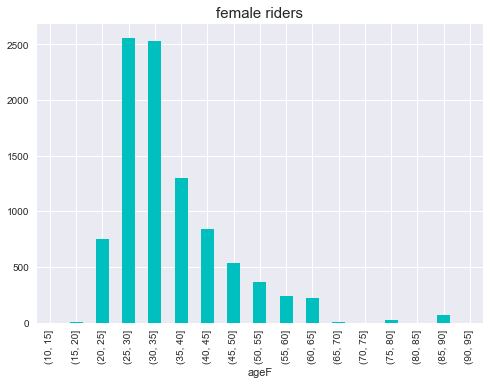

In [15]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False, color='m')
axM.set_title("male riders", fontsize=15)
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False, color='c')
axF.set_title("female riders", fontsize=15);


**Figure 1: histogrammed distribution of riders' ages by gender **

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]            NaN
(15, 20]       0.001102
(20, 25]       0.015286
(25, 30]       0.082915
(30, 35]       0.102832
(35, 40]       0.060241
(40, 45]       0.045135
(45, 50]       0.024317
(50, 55]       0.006208
(55, 60]       0.003054
(60, 65]       0.005278
(65, 70]       0.008102
(70, 75]            NaN
(75, 80]       0.006893
(80, 85]            NaN
(85, 90]            NaN
(90, 95]            NaN


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


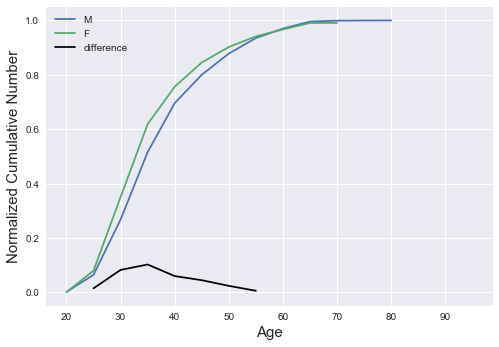

In [16]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age", fontsize=15)
pl.ylabel("Normalized Cumulative Number", fontsize=15)
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' ages by gender**

### Null Hypothesis

Null Hypothesis : There is no statistical difference in the age distribution of male and female riders

$H_0:$ $Distribution$<sub>$male$</sub>$  = Distribution$<sub>$female$</sub>

$H_1:$ $Distribution$<sub>$male$</sub> $\neq Distribution$<sub>$female$</sub>

$\alpha = 0.05$

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [17]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks)

Ks_2sampResult(statistic=0.15439627321430716, pvalue=4.4658022586182943e-153)


**  FILL IN THE CELL BELOW!**

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

Critical value
![](https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/Lab4_fb55/ks2sample_table.png)

Significance level
 
$\alpha$ $= 0.05$

$c($$\alpha) = 1.36$

In [18]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks,'\n')
       
reject = 1.36*np.sqrt((len(df.ageM)+len(df.ageF))/(len(df.ageM)*len(df.ageF)))

if ks[0] > reject:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is NOT rejected")

Ks_2sampResult(statistic=0.15439627321430716, pvalue=4.4658022586182943e-153) 

Null hypothesis is rejected


# Now retest using a test for correlation. 
### 1 ride every of 200

In [19]:
# slicing sample
ageM_sample = df.ageM[np.arange(0,len(df.ageM),200)]
ageF_sample = df.ageF[np.arange(0,len(df.ageF),200)]

In [20]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print (ks,'\n')
       
reject = 1.36*np.sqrt((len(ageM_sample)+len(ageF_sample))/(len(ageM_sample)*len(ageF_sample)))

if ks[0] > reject:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is NOT rejected")

Ks_2sampResult(statistic=0.15439627321430716, pvalue=4.4658022586182943e-153) 

Null hypothesis is NOT rejected


# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [21]:
# check size
print('F : {}\nM : {}'.format(len(df.ageF), len(df.ageM)))

F : 9451
M : 33096


In [22]:
# Because the ageF has fewer data, thus size of ageF is chosen
# arrange new data frame for ageM
ageM = df['ageM'].copy()
ageM.index = range(len(ageM))
# creating number of len(ageF) sample for ageM based on ageM range
sample = np.linspace(1,len(ageM)-1,len(df.ageF)).astype(int)
ageM = ageM[sample]
ageM.sort_values(inplace = True)
#sort ageF
ageF = df['ageF'].copy()
ageF.sort_values(inplace = True)

In [23]:
# check size again
print('F : {}\nM : {}'.format(len(ageF), len(ageM)))

F : 9451
M : 9451


In [24]:
# running r pearson correlation
r = scipy.stats.pearsonr(ageM,ageF)
print("Result for R Pearson's test for correlation \nr pearson = {:.4f} \np value = {:.4f}\n".format(r[0], r[1]))

if r[1] < 0.05:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is NOT rejected")

Result for R Pearson's test for correlation 
r pearson = 0.9786 
p value = 0.0000

Null hypothesis is rejected


R pearson correlation is close to 1, therefore there is strong correlation between male age distribution and female age distribution. Moreover $p$<sub>$value$</sub>$ < \alpha$, which means the result is statistically significant and H<sub>0</sub> is rejected.  

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [25]:
spearman = scipy.stats.spearmanr(ageM,ageF)
print("Result for Spearman's test for correlation \nCorrelation = {:.4f} \np value = {:.4f}\n".format(spearman[0], spearman[1]))

if spearman[1] < 0.05:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is NOT rejected")

Result for Spearman's test for correlation 
Correlation = 0.9978 
p value = 0.0000

Null hypothesis is rejected


Spearman's correlation coefficient is close to 1, therefore there is strong correlation between male age distribution and female age distribution. Moreover result of $p$<sub>$value$</sub>$ < \alpha$, which means the result is statistically significant and H<sub>0</sub> is rejected.  

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

In [26]:
print("KS : {}\nR Pearson : {}\nSpearman : {}".format(ks,r,spearman))

KS : Ks_2sampResult(statistic=0.15439627321430716, pvalue=4.4658022586182943e-153)
R Pearson : (0.97859659585372694, 0.0)
Spearman : SpearmanrResult(correlation=0.9977909862296962, pvalue=0.0)


The number of on scipy test for correlation returned 2 index, the first one is the correlation coefficient for R pearson test and Spearman test while KS return KS statistics for two side test. The second index, is the p value of the statistics.

## Trip duration of bikers that ride during the day vs night

**Null Hypothesis** : There is no statistical difference in bikers that ride during the day and the night

> $H_0: Duration$<sub>$day$</sub> $= Duration$<sub>$night$</sub>

> $H_1: Duration$<sub>$day$</sub> $\neq Duration$<sub>$night$</sub>

> $\alpha = 0.05 $

In [27]:
# new data frame
df2 = df.copy()
df2.columns

Index(['tripduration', 'start station id', 'start station latitude',
       'start station longitude', 'end station id', 'end station latitude',
       'end station longitude', 'bikeid', 'birth year', 'gender', 'date',
       'ageM', 'ageF'],
      dtype='object')

In [28]:
# drop unnecessary columns
df2 = df2.drop(['start station id', 'start station latitude',
       'start station longitude', 'end station id', 'end station latitude',
       'end station longitude', 'bikeid', 'birth year', 'gender', 'ageM', 'ageF'], axis=1)
df2.head(3)

,tripduration,date
1,439,2017-07-01 00:02:35
2,186,2017-07-01 00:04:33
3,442,2017-07-01 00:05:53


In [29]:
# convert to datetime format
df2["date"] = pd.to_datetime(df2["date"],format="%m/%d/%Y %H:%M:%S")
df2["hour"] = df2.date.dt.hour
# create new clumn for day or night
def daynight(hour):
    if (hour >= 6 and hour < 18):
        return "D"
    else:
        return "N"
df2["DN"] = df2["hour"].apply(daynight)
df2.head(3)

,tripduration,date,hour,DN
1,439,2017-07-01 00:02:35,0,N
2,186,2017-07-01 00:04:33,0,N
3,442,2017-07-01 00:05:53,0,N


In [30]:
df2['day'] = df2["DN"][(df2["DN"] == "D")]
df2['night'] = df2["DN"][(df2["DN"] == "N")]
df2.head(3)

,tripduration,date,hour,DN,day,night
1,439,2017-07-01 00:02:35,0,N,NaN,N
2,186,2017-07-01 00:04:33,0,N,NaN,N
3,442,2017-07-01 00:05:53,0,N,NaN,N


In [31]:
df2['tripduration'].describe()

count     42957.000000
mean        583.679284
std        4343.365905
min          61.000000
25%         235.000000
50%         347.000000
75%         579.000000
max      802101.000000
Name: tripduration, dtype: float64

In [32]:
# get trip
df2['tripDay'] = df2['tripduration'][(df2['DN'] == "D")]
df2['tripNight'] = df2['tripduration'][(df2['DN'] == "N")]
df2.head()

,tripduration,date,hour,DN,day,night,tripDay,tripNight
1,439,2017-07-01 00:02:35,0,N,NaN,N,NaN,439.0
2,186,2017-07-01 00:04:33,0,N,NaN,N,NaN,186.0
3,442,2017-07-01 00:05:53,0,N,NaN,N,NaN,442.0
4,170,2017-07-01 00:07:54,0,N,NaN,N,NaN,170.0
5,189,2017-07-01 00:08:06,0,N,NaN,N,NaN,189.0


In [33]:
# dropping NaN values
df2['tripDay'].dropna(inplace= True)
df2['tripNight'].dropna(inplace= True)

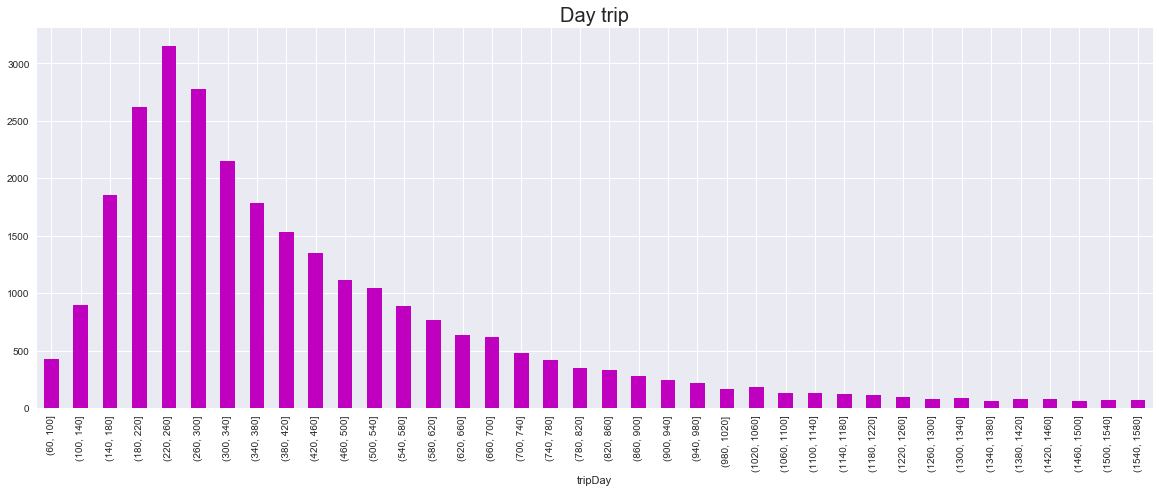

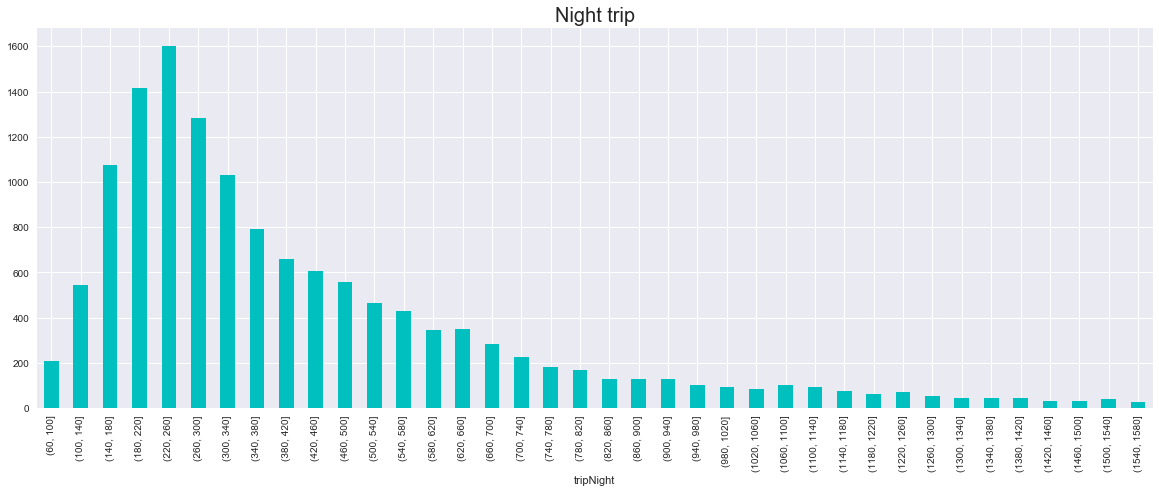

In [34]:
bins = np.arange(60, 1600, 40)
axD = df2.tripDay.groupby(pd.cut(df2.tripDay, bins)).agg([np.count_nonzero]).plot(kind='bar', 
                                                                legend=False, figsize=(20,7), color='m')
axD.set_title("Day trip", fontsize=20)
axN = df2.tripNight.groupby(pd.cut(df2.tripNight, bins)).agg([np.count_nonzero]).plot(kind='bar',
                                                                legend=False, figsize=(20,7), color='c')
axN.set_title("Night trip", fontsize=20)

**Figure 3: histogrammed distribution of trip duration by day/night**

              count_nonzero
tripDay                    
(60, 100]          0.000163
(100, 140]         0.007170
(140, 180]         0.018629
(180, 220]         0.027231
(220, 260]         0.030387
(260, 300]         0.023735
(300, 340]         0.021060
(340, 380]         0.014237
(380, 420]         0.007054
(420, 460]         0.002555
(460, 500]         0.003142
(500, 540]         0.000888
(540, 580]         0.001457
(580, 620]         0.003908
(620, 660]         0.001269
(660, 700]         0.003043
(700, 740]         0.004174
(740, 780]         0.006027
(780, 820]         0.006330
(820, 860]         0.009099
(860, 900]         0.009651
(900, 940]         0.009369
(940, 980]         0.009686
(980, 1020]        0.008922
(1020, 1060]       0.009582
(1060, 1100]       0.006957
(1100, 1140]       0.004957
(1140, 1180]       0.003989
(1180, 1220]       0.003505
(1220, 1260]       0.001558
(1260, 1300]       0.000644
(1300, 1340]       0.000536
(1340, 1380]       0.000261
(1380, 1420]       0

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


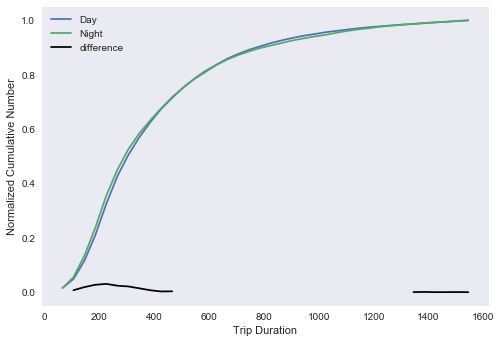

In [35]:
csD=df2.tripDay.groupby(pd.cut(df2.tripDay, bins)).agg([count_nonzero]).cumsum()

csN=df2.tripNight.groupby(pd.cut(df2.tripNight, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.grid()
pl.legend()

**Figure 4. the cumulative distribution of CitiBike riders' trip duration by day/night**

## KS tests to compare 2 samples

In [36]:
ks = scipy.stats.ks_2samp(df.ageM, df.ageF)
print ('KS test correlation result\n',ks,'\n')
       
reject = 1.36*np.sqrt((len(df.ageM)+len(df.ageF))/(len(df.ageM)*len(df.ageF)))

if ks[0] > reject:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is NOT rejected")

KS test correlation result
 Ks_2sampResult(statistic=0.15439627321430716, pvalue=4.4658022586182943e-153) 

Null hypothesis is rejected


## Pearson's  test for correlation

In [37]:
# check size
print('Day : {}\nNight : {}'.format(len(df2.tripDay), len(df2.tripNight)))

Day : 28765
Night : 14192


In [38]:
# Because the tripNight has fewer data, thus size of tripNight is chosen
# arrange new data frame for tripDay
tripDay = df2['tripDay'].copy()
tripDay.index = range(len(tripDay))
# creating number of len(ageF) sample for ageM based on ageM range
sample2 = np.linspace(1,len(tripDay)-1,len(df2.tripNight)).astype(int)
tripDay = tripDay[sample2]
tripDay.sort_values(inplace = True)
#sort ageF
tripNight = df2['tripNight'].copy()
tripNight.sort_values(inplace = True)

In [39]:
# check size again
print('Day : {}\nNight : {}'.format(len(tripDay), len(tripNight)))

Day : 14192
Night : 14192


In [40]:
# running r pearson correlation
r = scipy.stats.pearsonr(tripDay,tripNight)
print("Result for R Pearson's test for correlation \nr pearson = {:.4f} \np value = {:.4f}\n".format(r[0], r[1]))

if r[1] < 0.05:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is NOT rejected")

Result for R Pearson's test for correlation 
r pearson = 0.7215 
p value = 0.0000

Null hypothesis is rejected


R pearson correlation is close to 1, therefore there is strong correlation between trip day distribution and trip night distribution. Moreover $p$<sub>$value$</sub>$ < \alpha$, which means the result is statistically significant and H<sub>0</sub> is rejected, which is there is difference between day trip and night trip.  

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [41]:
spearman = scipy.stats.spearmanr(tripDay,tripNight)
print("Result for Spearman's test for correlation \nCorrelation = {:.4f} \np value = {:.4f}\n".format(spearman[0], spearman[1]))

if spearman[1] < 0.05:
    print("Null hypothesis is rejected")
else:
    print("Null hypothesis is NOT rejected")

Result for Spearman's test for correlation 
Correlation = 1.0000 
p value = 0.0000

Null hypothesis is rejected


Spearman's correlation coefficient is 1, therefore there is strong correlation between trip day distribution and trip night distribution. Moreover $p$<sub>$value$</sub>$ < \alpha$, which means the result is statistically significant and H<sub>0</sub> is rejected, which is there is difference between day trip and night trip.

** please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??**

In [42]:
print("KS : {}\nR Pearson : {}\nSpearman : {}".format(ks,r,spearman))

KS : Ks_2sampResult(statistic=0.15439627321430716, pvalue=4.4658022586182943e-153)
R Pearson : (0.72145555546248841, 0.0)
Spearman : SpearmanrResult(correlation=0.99999705376950521, pvalue=0.0)


The number of on scipy test for correlation returned 2 index, the first one is the correlation coefficient for R pearson test and Spearman test while KS return KS statistics for two side test. The second index, is the p value of the statistics.